In [2]:
import os
import sys
from dotenv import load_dotenv
load_dotenv
sys.path.append(os.getenv('UTILS_PATH'))

import pandas as pd


In [3]:
INPUT_DIR = os.getenv('INPUT_DIR')
OUTPUT_DIR = os.getenv('OUTPUT_DIR')

In [4]:
articles = pd.read_csv(INPUT_DIR + 'articles.csv')
customers = pd.read_csv(INPUT_DIR + 'customers.csv')
transactions = pd.read_csv(INPUT_DIR + 'transactions_train.csv')
sample = pd.read_csv(INPUT_DIR + 'sample_submission.csv')

# customers

In [7]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [8]:
customers.shape

(1371980, 7)

In [12]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [10]:
customers['customer_id'].nunique()

1371980

In [11]:
customers['FN'].value_counts(dropna=False)

NaN    895050
1.0    476930
Name: FN, dtype: int64

In [13]:
customers['Active'].value_counts(dropna=False)

NaN    907576
1.0    464404
Name: Active, dtype: int64

In [14]:
customers['club_member_status'].value_counts(dropna=False)

ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [15]:
customers['fashion_news_frequency'].value_counts(dropna=False)

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

<AxesSubplot:>

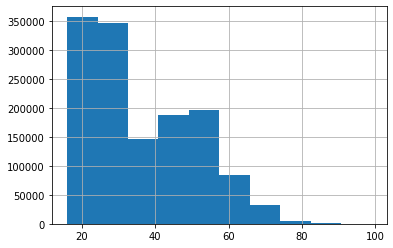

In [17]:
customers['age'].hist()

In [20]:
customers['postal_code'].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: postal_code, Length: 352899, dtype: int64

In [21]:
customers[customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c']

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
...,...,...,...,...,...,...,...
1371911,fffc36edc9658a27fc810a5a752b26a917c1a0a6b4261a...,NaN,NaN,ACTIVE,NONE,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371914,fffc582abe0ed452f145f2e86649d7d745a2b3a16942dd...,1.0,1.0,ACTIVE,Regularly,46.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371917,fffc8a9f1545e08fdf09f7dc3bd0736e1bdccceecca685...,1.0,1.0,ACTIVE,Regularly,48.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371943,fffdf87d73dfab4ff56920a14c89e6cc929fda2a0619c9...,NaN,NaN,ACTIVE,NONE,23.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


# articles

In [23]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [24]:
articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [25]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [27]:
articles = pd.read_csv(INPUT_DIR + 'articles.csv', dtype='object')

In [28]:
articles.dtypes

article_id                      object
product_code                    object
prod_name                       object
product_type_no                 object
product_type_name               object
product_group_name              object
graphical_appearance_no         object
graphical_appearance_name       object
colour_group_code               object
colour_group_name               object
perceived_colour_value_id       object
perceived_colour_value_name     object
perceived_colour_master_id      object
perceived_colour_master_name    object
department_no                   object
department_name                 object
index_code                      object
index_name                      object
index_group_no                  object
index_group_name                object
section_no                      object
section_name                    object
garment_group_no                object
garment_group_name              object
detail_desc                     object
dtype: object

In [29]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,09,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,09,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [30]:
articles.shape

(105542, 25)

In [31]:
articles['article_id'].nunique()

105542

In [33]:
articles['product_code'].nunique()

47224

In [34]:
articles[articles['product_code']=='0108775']

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,09,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [35]:
articles[articles['product_code']=='0110065']

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,09,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,0110065011,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [36]:
articles['prod_name'].value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

In [38]:
articles[articles['prod_name']=='Dragonfly dress']['product_code'].value_counts()

0739659    44
0690950    23
0677885    18
0804824     7
0870530     6
Name: product_code, dtype: int64

In [39]:
articles[articles['prod_name'].str.contains('(1)')]

/tmp/ipykernel_2533/3512434047.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  articles[articles['prod_name'].str.contains('(1)')]


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
6,0111565001,0111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,09,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,0111565003,0111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,0111586001,0111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,09,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,0111593001,0111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,09,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105474,0943264001,0943264,Lesly neckgaitor 1,80,Scarf,Accessories,1010016,Solid,09,Black,...,Men Sport Acc,S,Sport,26,Sport,22,Men H&M Sport,1019,Accessories,Running scarf in fast-drying functional fabric...
105489,0945308001,0945308,Fancy dot 1p Tight,304,Underwear Tights,Socks & Tights,1010009,Glittering/Metallic,09,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with glittery spots and an elasticated ...
105515,0947253001,0947253,ALICIA JERSEY HEADBAND 1,74,Hair/alice band,Accessories,1010016,Solid,09,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Hairbands in soft cotton jersey. Width 6 cm.
105534,0952267001,0952267,Heavy plain overknee tights 1p,304,Underwear Tights,Socks & Tights,1010013,Other pattern,09,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit tights with an elasticated waist tha...


In [40]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [44]:
articles[['product_type_no', 'product_type_name']].drop_duplicates().sort_values('product_type_no').to_csv('check.csv', index=False)

In [46]:
articles[['product_type_no', 'product_type_name']].drop_duplicates()['product_type_no'].value_counts(dropna=False)

253    1
499    1
349    1
303    1
300    1
      ..
264    1
66     1
70     1
71     1
483    1
Name: product_type_no, Length: 132, dtype: int64

In [47]:
articles[['product_type_no', 'product_type_name']].drop_duplicates()['product_type_name'].value_counts(dropna=False)

Umbrella          2
Vest top          1
Fine cosmetics    1
Heeled sandals    1
Nipple covers     1
                 ..
Other shoe        1
Blazer            1
Bag               1
Earring           1
Clothing mist     1
Name: product_type_name, Length: 131, dtype: int64

In [48]:
tmp = articles[['product_type_no', 'product_type_name']].drop_duplicates()
tmp[tmp['product_type_name']=='Umbrella']

,product_type_no,product_type_name
36,532,Umbrella
719,83,Umbrella


In [50]:
articles[['section_no', 'section_name']].drop_duplicates()['section_name'].value_counts(dropna=False)

Ladies Other                      2
Womens Lingerie                   1
Young Girl                        1
Womens Shoes                      1
Womens Tailoring                  1
Divided Projects                  1
Denim Men                         1
Men Other                         1
Womens Jackets                    1
Men Other 2                       1
Baby Boy                          1
Womens Casual                     1
Kids Accessories, Swimwear & D    1
Ladies H&M Sport                  1
Kids & Baby Shoes                 1
Baby Girl                         1
Kids Girl                         1
Divided Complements Other         1
Womens Premium                    1
Special Collections               1
Kids Sports                       1
Men Project                       1
Men Edition                       1
Collaborations                    1
Divided Asia keys                 1
EQ Divided                        1
Kids Local Relevance              1
Kids Outerwear              

# transactions

In [51]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [52]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [54]:
transactions = pd.read_csv(INPUT_DIR + 'transactions_train.csv', dtype={'customer_id':'str'}, parse_dates=['t_dat'])

In [55]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [57]:
transactions['t_dat'].min()

Timestamp('2018-09-20 00:00:00')

In [58]:
transactions['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [59]:
transactions['customer_id'].nunique()

1362281